ECE 447: Root Locus
===

Prof. Eric Klavins

&copy; 2019, University of Washington

# Code

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
from control import *

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
#     javascript(url=url)
#     return printing.latex(exp,**options)
# init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

# Definition of the Root Locus

Consider a system with the following block diagram:


<img width=55% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/root-locus-blocks.png">


Here, we have a plant $G(s)$, a controller $G_c(s)$ and a gain $K \geq 0$. The question is

> What are the poles of the closed loop system $T(s)$ as a function of the gain $K$?

The **root locus** is a plot of the locations of the poles of $T(s)$ in the imaginary plane as $K$ goes from $0$ to $\infty$. 

In [164]:
# Example
#
# Let's define a simple system and finds its root locus plot.
var("K s")
G = K*(s+1) / ( s**2 + 1 )
T = G / ( 1 + G )
T = T.simplify()
T

    K⋅(s + 1)     
──────────────────
             2    
K⋅(s + 1) + s  + 1

In [173]:
# Compute the poles
num,den = fraction(T)
poles = solve(den,s)
poles

⎡         ______________           ______________⎤
⎢        ╱  2                     ╱  2           ⎥
⎢  K   ╲╱  K  - 4⋅K - 4     K   ╲╱  K  - 4⋅K - 4 ⎥
⎢- ─ - ─────────────────, - ─ + ─────────────────⎥
⎣  2           2            2           2        ⎦

In [174]:
# Find the K that makes the imaginary parts 0, so the system is critically damped.
# Note, K is non-negative, so one of these won't matter.
solve(K**2-4*K-4,K)

[2 + 2⋅√2, -2⋅√2 + 2]

In [175]:
# We can figure out the poles for other values of K as well.
gains = [ 0, 1, 2 + sqrt(2), 5, 10, 100]

print("K\t\tpole[0](K)\n----------------------------------")
for k in points:
    print("%0.2f" % N(k), "\t\t", N(poles[0].subs(K,k),2) )
print("\nK\t\tpole[1](K)\n----------------------------------")
for k in points:
    print("%0.2f" % N(k), "\t\t", N(poles[1].subs(K,k),2) )    

K		pole[0](K)
----------------------------------
0.00 		 -1.0*I
1.00 		 -0.5 - 1.3*I
3.41 		 -1.7 - 1.2*I
5.00 		 -3.0
10.00 		 -8.7
100.00 		 -99.

K		pole[1](K)
----------------------------------
0.00 		 1.0*I
1.00 		 -0.5 + 1.3*I
3.41 		 -1.7 + 1.2*I
5.00 		 -2.0
10.00 		 -1.3
100.00 		 -1.0


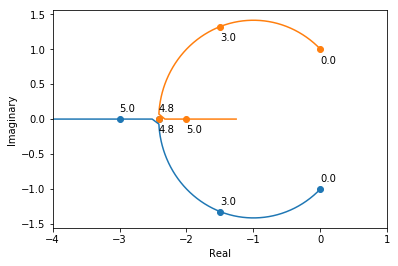

In [179]:
# Now let's plot the whole root locus in the imaginary plane

# Define all the values of K we will use
Kvals = np.linspace(0,10,1000)

# Create numpy functions from expressions for the poles
f0 = lambdify(K,[re(poles[0]),im(poles[0])],'numpy')
f1 = lambdify(K,[re(poles[1]),im(poles[1])],'numpy')

# Plot
plt.plot(f0(Kvals)[0],f0(Kvals)[1])
plt.plot(f1(Kvals)[0],f1(Kvals)[1])
plt.xlabel("Real")
plt.ylabel("Imaginary")

# Point out some particular values of K
gains = [0,3,2+2*np.sqrt(2),5]

for k in gains:
    plt.text(f0(k)[0], f0(k)[1]+0.1,"%0.1f" % k)
    plt.text(f1(k)[0], f1(k)[1]-0.2,"%0.1f" % k)    

plt.scatter(f0(gains)[0],f0(gains)[1])
plt.scatter(f1(gains)[0],f1(gains)[1])

plt.xlim(-4,1);

⎛            2    ⎞
⎝K⋅(s + 1), s  + 1⎠

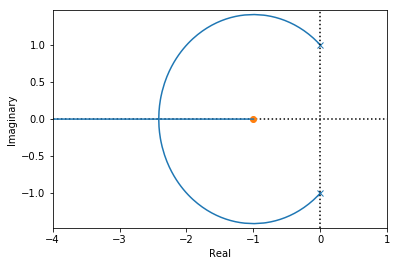

In [177]:
# You can do most of the above with the control systems toolbox.
# The plot is better in that it shows the poles and zeros, but also 
# finds the x-intercept better than our plot does.
sys = tf([1,1],[1,0,1])
plot = root_locus(sys,xlim=(-4,1))
fraction(G)

# Property 1: Limits

Say $G$ is a controller $G_c$ in series with a plant $G_p$. And suppose that

$$
G(s) = G_c(s) G_p(s) = \frac{p(s)}{q(s)}
$$

where $p(s)$ and $q(s)$ are polynomials. Then the closed loop transfer function is

$$
T(s) = \frac{G(s)}{1+G(s)} = \frac{\frac{Kp(s)}{q(s)}}{1+\frac{Kp(s)}{q(s)}} = \frac{Kp(s)}{q(s)+Kp(s)}.
$$

Thus,

**K=0**: In this case the poles of $T(s)$ are the roots of $q(s)$ -- the **poles** of $G(s)$. 

**K=$\infty$**: In this case, the $T(s)$ tends to $p(s)/p(s)$, so the poles of $T(s)$ are the roots of $p(s)$ -- the **zeros** of $G(s)$.

Therefore,

> The root locus goes from the poles of $G(s)$ to the zeros of $G(s)$ as $K$ goes from $0$ to $\infty$. 

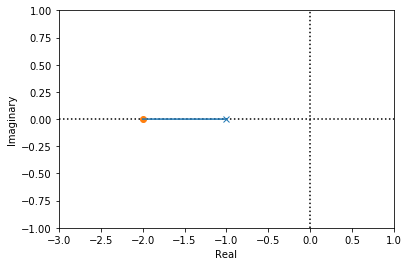

In [180]:
# Example: Say G(s) = (s+2) / (s+1)
# 
# In this case, the root locus goes from -1 to -2.
#
G = tf([1,2],[1,1])
plot = root_locus(G,xlim=[-3,1])

In [186]:
# Note that we could have drawn this without Python or even knowing what T(s) is.
# But just to check.
G = (s+2)/(s+1)
T = K*G / ( 1 + K*G )
num,den = fraction(T)
pole = solve(den,s)[0]
pole

-(2⋅K + 1) 
───────────
   K + 1   

In [188]:
pole.subs(K,0), limit(pole,K,oo)

(-1, -2)

# Property 2: Symmetry

> The root locus is **symmetric** about the real axis, because poles come in complex conjugate pairs.

**Note**: In the previous example, this property shows the root locus for only one pole does not come off of the real axis.

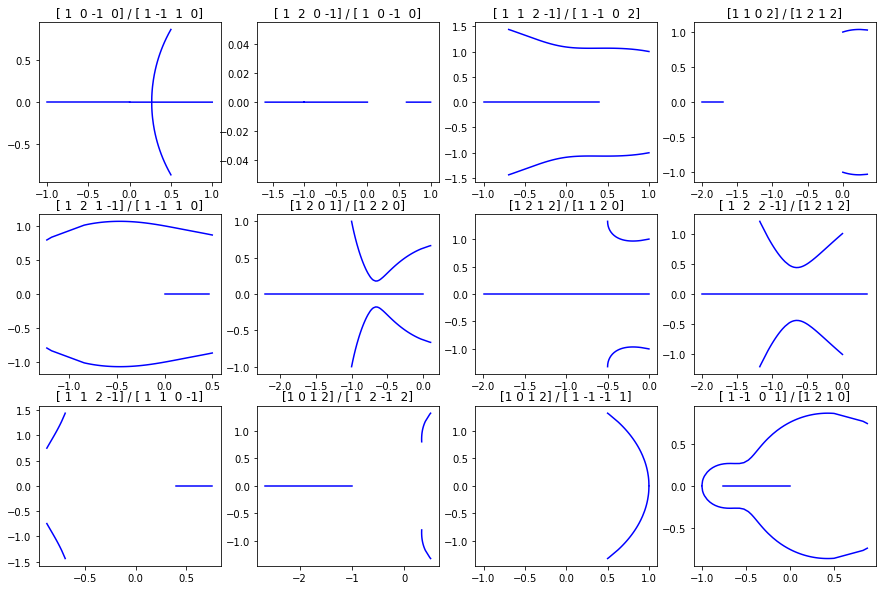

In [300]:
# Example: Some random root locus plots

fig, ax = plt.subplots(3,4, figsize=(15, 10));

for i in range(3):
    for j in range(4):
        num = np.random.randint(4, size=4) - 1
        den = np.random.randint(4, size=4) - 1
        num[0] = 1
        den[0] = 1
        G = tf(num,den)
        rlist, klist = root_locus(G,Plot=false)
        for p in range(len(rlist[0])):
            ax[i,j].plot(np.real(rlist[:,p]),np.imag(rlist[:,p]),"b")
            ax[i,j].set_title(np.array2string(num) + " / " + np.array2string(den))

# Property 3: Angles

Say

$$
F(s) = \frac{p(s)}{q(s)} = \frac{(s+z_1)(s+z_1) \dots}{(s+p_1)(s+p_2)\dots}
$$ 

is a function from imaginary numbers into imaginary numbers.

If we evaluate $F(s)$ for any given $s$ we get

$$
F(s) = M \angle \theta
$$

where

$$
M = \frac{|s+z_1||s+z_2|\dots}{|s+p_1||s+p_2|\dots}
$$

and

$$
\theta = \sum \angle ( s+z_i ) - \sum \angle ( s + p_i )
$$

In [316]:
# Example
F = (s+1)/(s*(s+2))

# Try s = 1
S = 1
M = abs(S+1) / ( abs(S+0) * abs(S+2) )
theta = arg(S+1) - arg(S+0) - arg(S+2)

M,theta

(0.6666666666666666, 0)

In [317]:
F.subs(s,S)

2/3

In [320]:
# Try s = -1 + i
S = -1 + I

M = abs(S+1) / ( abs(S+0) * abs(S+2) )
theta = arg(S+1) - arg(S+0) - arg(S+2)

M,theta

⎛     -π ⎞
⎜1/2, ───⎟
⎝      2 ⎠

In [323]:
N(F.subs(s,S))

-0.5⋅ⅈ

Now consider

$$
T(s) = \frac{KG(s)}{1+KG(s)}
$$

This has a pole when

$$
KG(s) = -1
$$

or when 

$$
\angle KG(s) = \pi
$$

If $s$ is a **real root**, then this means

$$
\angle G(s) = \sum \angle \mathrm{zeros\;of\;G(s)} -  \sum \angle \mathrm{poles\;of\;G(s)} = \pi
$$

You can see that any complex conjugate pairs cancel:

<img width=55% src="https://raw.githubusercontent.com/klavins/ECE447/master/images/angle-prop.png">

The result is that

> There must be an odd number of poles or zeros to the left of any part of the root locus on the real axis.

In [329]:
# Example
G = (s+3)*(s-1)*(s-2) / ( (s+1)*(s+2)*(s-3) )
G.cancel()

 3          
s  - 7⋅s + 6
────────────
 3          
s  - 7⋅s - 6

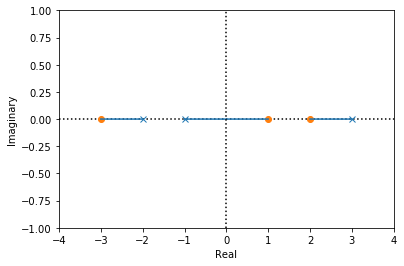

In [332]:
sys = tf([1,0,-7,6],[1,0,-7,-6])
plot = root_locus(sys,xlim=(-4,4))

In [335]:
# Example: To connect two real regions, you need to go imaginary, since
# there can be no real part in between.
#
# In this plot, the root locus has to go from the poles at 1,2 to the zeros at -1,-2.
G = (s+1)*(s+2) / ( (s-1)*(s-2) )
G.cancel()

 2          
s  + 3⋅s + 2
────────────
 2          
s  - 3⋅s + 2

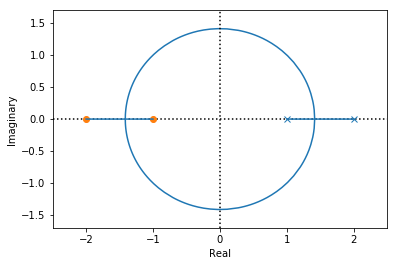

In [340]:
sys = tf([1,3,2],[1,-3,2])
plot = root_locus(sys,xlim=(-2.5,2.5),ylim=(-1.7,1.7))

In [349]:
# Find the imaginary axis crossing
T = K*G / ( 1 + K*G )
T.cancel()

           2                     
        K⋅s  + 3⋅K⋅s + 2⋅K       
─────────────────────────────────
   2                  2          
K⋅s  + 3⋅K⋅s + 2⋅K + s  - 3⋅s + 2

In [353]:
# When the denominator has zero coefficient multiplying s, we get pure imaginary roots
# That occues when K=1, when makes the denominator
# s^2 + 4
# which has roots +/i \sqrt(2) i
#
# So for the above system to be stable, K >= 1 is required.
num,den = fraction(T)
solve(den.subs(K,1),s)

[-√2⋅ⅈ, √2⋅ⅈ]

# Property 4: Zeros at $\infty$

Consider 

$$
KG(s) = \frac{K}{(s+1)(s+2)}
$$

which has more poles than zeros. If the root locus goes from the poles to the zeros, then where does it go where there are not enough?

For this system, we can find the roots of $T(s) = KG(s) / ( 1+ KG(s) )$ which are

$$
- \frac{3}{2} \pm \frac{1}{2}\sqrt{-4K+1}
$$

You can see that as $K \rightarrow \infty$, we have that the imaginary part of the above goes to $ \pm i \infty$. So the root locus goes to **zeros at infinity**:

$$
- \frac{3}{2} \pm i \infty .
$$

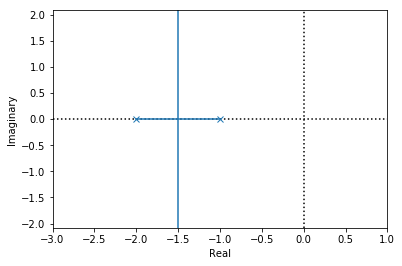

In [394]:
# Example:
sys=tf([1],[1,3,2])
plot=root_locus(sys,xlim=(-3,1))

More generally, it turns out that the zeros at infinity lay along asymptotes with real axis intercept $\sigma_0$ and angle $\theta$ where

$$
\sigma_0 = \frac{\sum \mathrm{finite\;poles} - \sum \mathrm{finite\;zeros}}{\# \mathrm{finite\;poles} - \# \mathrm{finite\;zeros}}
$$

and

$$
\theta = \frac{(2k+1)\pi}{\# \mathrm{finite\;poles} - \# \mathrm{finite\;zeros}}
$$

where $k$ is 0,1,2, ...

Note: The above formula refers to the poles and zeros of $G(s)$.

So for the above example:

$$
\sigma_0 = \frac{
  -1-2 
}{2-0} = -\frac{3}{2}.
$$

and

$$
\theta = \frac{\pi}{2}, \frac{3\pi}{2}, \dots
$$

as we already found.

In [431]:
# Another example with three zeros at infinity
G = 1 / ( (s+1) * ( s**2 + 1) )
sigma = (-1 - i + i ) / ( 3 - 0 )
theta = [ pi /( 3-0 ), 3*pi /( 3-0 ), 5*pi /( 3-0 )]
sigma, theta

⎛                     ⎡π     5⋅π⎤⎞
⎜-0.3333333333333333, ⎢─, π, ───⎥⎟
⎝                     ⎣3      3 ⎦⎠

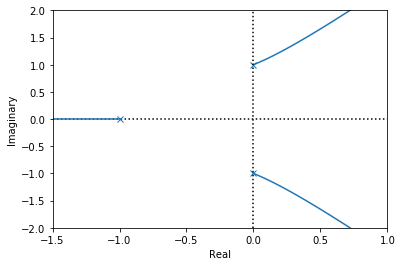

In [430]:
sys=tf([1],[1,1,1,1])
xvals=np.linspace(-0.33333,10,10)
r,k=root_locus(sys,xlim=(-1.5,1),ylim=(-2,2))